# Deep Q-Network: Banana Problem

---

This notebook shows how to solve the Banana Problem using a Deep Q-Network. 

### 1. Load environment

This notebook uses a Udacity workspace. If you're working from your local machine, be sure to install the `drlnd` python environment and Unity Banana environment as discussed in the readme! 

In [1]:
!pip -q install ../../python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 3.0.5 which is incompatible.


In [2]:
import numpy as np
import torch
from unityagents import UnityEnvironment
import dqn_agent
import deepqnetwork as dq

### 2. Setup Problem

In [6]:
env = UnityEnvironment(file_name="/data/Banana_Linux_NoVis/Banana.x86_64")
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


### 3. Train the Agent

Set constant parameters.

In [7]:
params = {'BUFFER_SIZE': int(1e5), # replay buffer size
         'BATCH_SIZE': 64,         # minibatch size
         'GAMMA': 0.99,            # discount factor
         'TAU': 1e-3,              # soft update for target parameters
         'LR': 4e-4,               # learning rate
         'UPDATE_EVERY': 4         # how often to update the network
         }
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

Build agent.

In [8]:
env_info = env.reset(train_mode=True)[brain_name]
state = env_info.vector_observations[0]
state_size = len(state)
action_size = brain.vector_action_space_size
agent = dqn_agent.Agent(state_size, action_size, 0, device, params)

Train.

In [11]:
scores = dq.DeepQNetwork(env, agent).dqn_solver()

Episode 100	Average Score: 0.64
Episode 200	Average Score: 4.17
Episode 300	Average Score: 7.63
Episode 400	Average Score: 10.99
Episode 474	Average Score: 13.00
Environment solved in 374 episodes!	Average Score: 13.00


Close the environment.

In [12]:
env.close()

### 4. Plot Results

<function matplotlib.pyplot.plot(*args, **kwargs)>

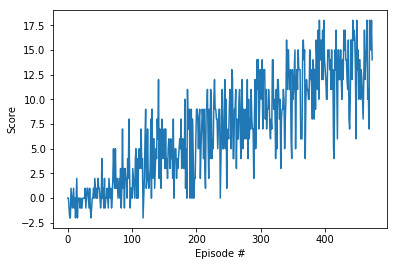

In [14]:
# plot the scores
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.plot